# Outlier Detection with IQR (Inter- quartile Range)

## OBJECTIVE

Interquartile range (IQR) (https://en.wikipedia.org/wiki/Interquartile_range) is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, which is a popular method to detect outliers for preprocessing the data. The purpose of this lab is to implement IQR algorithm for outlier detection.
PREREQUISITES
Check the lecture slides Part II (Lecture 3.2) and be familiar with IQR algorithm below.

## IQR Algorithm for Outlier Detection

1. Arrange the data in ascending order
2. Calculate Q1 (the first Quarter)
3. Calculate Q3 (the third Quartile)
4. Calculate IQR = (Q3 - Q1)
5. Calculate the lower Range Tlower = Q1 -(1.5 * IQR)
6. Calculate the upper Range Tupper = Q3 + (1.5 * IQR)
7. Detect outliers with the lower Range and the upper Range. If the data is not in the range [Tlower,Tupper], then the data will be filtered out as outliers.

## INSTRUCTIONS

- Implement IQR algorithm with Python
- Test IQR on the attribute "LotArea" of training data of House Price Prediction from Kaggle Data to detect and remove its outliers. The data can be downloaded from Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview ).
- Compare the original data and preprocessed data by plotting (https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)

In [1]:
import numpy as np

def detect_outliers(data):
    # Step 1: Sort the data in ascending order
    sorted_data = np.sort(data)
    # Step 2: Calculate Q1 (the first quartile)
    q1_index = int(len(sorted_data) * 0.25)
    q1 = sorted_data[q1_index]
    # Step 3: Calculate Q3 (the third quartile)
    q3_index = int(len(sorted_data) * 0.75)
    q3 = sorted_data[q3_index]
    # Step 4: Calculate IQR (Interquartile Range)
    iqr = q3 - q1
    # Step 5: Calculate the lower range (Tlower)
    t_lower = q1 - (1.5 * iqr)
    # Step 6: Calculate the upper range (Tupper)
    t_upper = q3 + (1.5 * iqr)
    # Step 7: Detect outliers
    outliers = []
    for value in data:
        if value < t_lower or value > t_upper:
            outliers.append(value)
    return outliers

data = [10, 12, 15, 17, 20, 22, 25, 30, 35, 40, 45, 50, 100, 200]

outliers = detect_outliers(data)
print("Outliers:", outliers)

Outliers: [100, 200]


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./datasets/TP11/train.csv')

# Extract the "LotArea" values
lot_area = data['LotArea'].values

# Use the detect_outliers function
outliers = detect_outliers(lot_area)
print("Outliers:", outliers)

Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


In [3]:
# Remove the outliers
lot_area = [value for value in lot_area if value not in outliers]
print("LotArea:", lot_area)

LotArea: [8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 11924, 12968, 10652, 10920, 6120, 11241, 10791, 13695, 7560, 14215, 7449, 9742, 4224, 8246, 14230, 7200, 11478, 16321, 6324, 8500, 8544, 11049, 10552, 7313, 13418, 10859, 8532, 7922, 6040, 8658, 16905, 9180, 9200, 7945, 7658, 12822, 11096, 4456, 7742, 13869, 6240, 8472, 7134, 10175, 2645, 11645, 13682, 7200, 13072, 7200, 6442, 10300, 9375, 9591, 10665, 4608, 15593, 13651, 7599, 10141, 10200, 5790, 1596, 8475, 8635, 10778, 10440, 13000, 4500, 10206, 8892, 8530, 16059, 11911, 3951, 8470, 8070, 7200, 8500, 13360, 7200, 9337, 9765, 10264, 10921, 10625, 9320, 10603, 9206, 7018, 10402, 7758, 9375, 10800, 6000, 8500, 11751, 9525, 7750, 9965, 7259, 3230, 11616, 8536, 12376, 8461, 6060, 9464, 7892, 17043, 6780, 4928, 4388, 7590, 8973, 14200, 12224, 7388, 6853, 10335, 10400, 10355, 11070, 9066, 15426, 10500, 11645, 8520, 10335, 9100, 2522, 6120, 9505, 7500, 6240, 10356, 13891, 14803, 13500, 11340, 9600, 7200, 12003

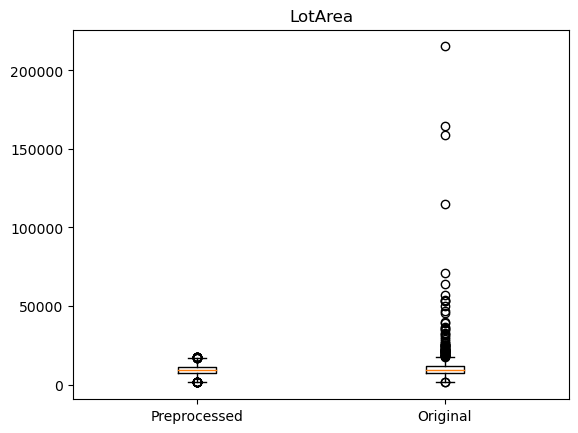

In [5]:
# Plot the boxplot to compare the original data and preprocessed data
import matplotlib.pyplot as plt

plt.boxplot([lot_area, data['LotArea'].values], labels=['Preprocessed', 'Original'])
plt.title('LotArea')
plt.show()